In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequalityN.csv")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#output values only contains no. from 3-9
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [6]:
# a mapping dictionary that maps the quality values from 0-6
quality_mapping = {3:0,
                    4:1,
                    5:2,
                    6:3,
                    7:4,
                    8:5,
                    9:6}
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [7]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3


In [8]:
df.shape

(6497, 13)

In [9]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
df = df.fillna(value=df.mean())

In [11]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#using sample with frac=1 to shuffle the dataset
#reset the index after shuffling
df = df.sample(frac=1).reset_index(drop= True)

#selecting first 1000 rows for training set
df_train = df.head(1000)

#selecting last 600 rows for testing/validation
df_test = df.tail(600)


In [13]:
from sklearn import tree
from sklearn import metrics

#intialize decesion tree classifier class
#with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth =3)

In [14]:
features = df.columns[1:-1]
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [15]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


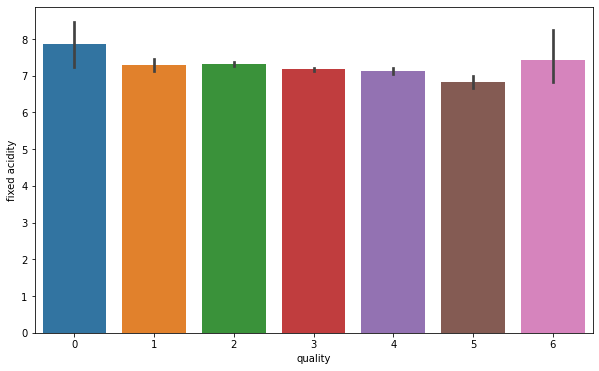

In [16]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

#so should we drop this column??

In [17]:
#train te model on the provided features
# and mapped the quality from before
clf.fit(df_train[features],df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [23]:
# generate prediction on the training set
train_predictions = clf.predict(df_train[features])

# generate prediction on the testing set
test_predictions = clf.predict(df_test[features])

# calculate the accuracy of the predictions on the train data set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

# calculate the accuracy of the predictions on the test data set
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [20]:
print("train accuracy {}".format(train_accuracy))
print("test accuracy {}".format(test_accuracy))

train accuracy 0.555
test accuracy 0.5033333333333333


In [22]:
#increasing the depth to 7
clf = tree.DecisionTreeClassifier(max_depth =7)
clf.fit(df_train[features],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [25]:
print("train accuracy {}".format(train_accuracy))
print("test accuracy {}".format(test_accuracy))
#performance decreased in test set, issue of overfitting is detected

train accuracy 0.691
test accuracy 0.465


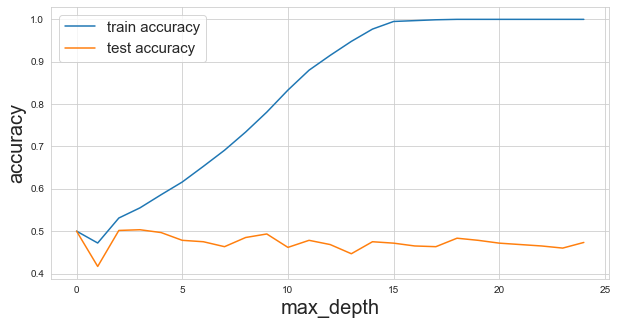

In [26]:
#initailizing the list to store train and test accuracies
# we start from 50%
test_accuracies = [0.5]
train_accuracies = [0.5]


#iterating over few depth
for i in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(df_train[features],df_train.quality)
    
    # generate prediction on the training set
    train_predictions = clf.predict(df_train[features])
    
    # generate prediction on the testing set
    test_predictions = clf.predict(df_test[features])
    # calculate the accuracy of the predictions on the train data set
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    # calculate the accuracy of the predictions on the test data set
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    #appened accurarcies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

#plotting
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label="test accuracy")
plt.legend(loc ="upper left",prop ={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

<H2>Weeee...Woooo....Weeee...Woooo IT'S OVERFITTING!!!!!</H2>